In [45]:
import numpy as np
import sys
sys.path.append('/home/hooshmand/Documents/Git/myenv/lib/python3.11/site-packages')
import h5py
import matplotlib.pyplot as plt

In [36]:
def load_train_dataset(fileLoc):
    with h5py.File(fileLoc, 'r') as file:
        trainset_x = np.array(file['train_set_x'][:])
        trainset_y = np.array(file['train_set_y'][:])
        
        trainset_y = trainset_y.reshape((1, trainset_y.shape[0]))
       
    return trainset_x, trainset_y

In [37]:
def load_test_dataset(fileLoc):
    with h5py.File(fileLoc, 'r') as file:
        testset_x = np.array(file['test_set_x'][:])
        testset_y = np.array(file['test_set_y'][:])
        list_classes = np.array(file['list_classes'][:])
        
        testset_y = testset_y.reshape((1, testset_y.shape[0]))
        
    return testset_x, testset_y, list_classes

In [41]:
trainset_x, trainset_y = load_train_dataset('Data/train_catvnoncat.h5')
testset_x, testset_y, classes = load_test_dataset('Data/test_catvnoncat.hdf')

### Show Images

In [44]:
trainset_x[0].shape

(64, 64, 3)

It is not a cat.


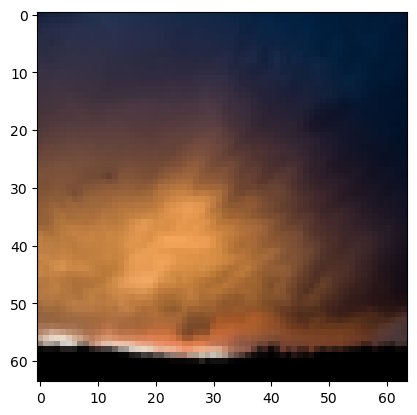

In [50]:
plt.imshow(trainset_x[0])
print("It is a cat" if trainset_y[0][0] == 1 else "It is not a cat.")

It is a cat picture.


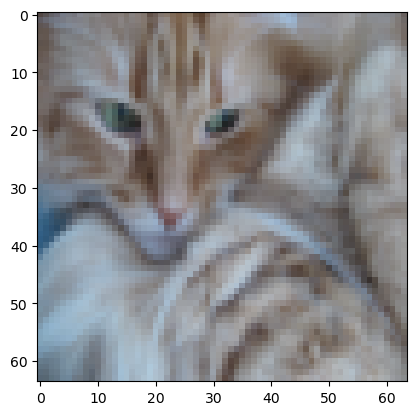

In [62]:
plt.imshow(trainset_x[2])
print("It is a cat picture." if trainset_y[0][2] == 1 else "It is not a cat picture.")

### Reshap some values

In [64]:
print ("Number of training examples: " + str(trainset_x.shape[0]))
print ("Number of testing examples: " + str(testset_x.shape[0]))
print ("Height/Width of each image: " + str(trainset_x.shape[1]))
print ("Each image is of size: (" + str(trainset_x.shape[1]) + ", " + str(trainset_x.shape[1]) + ", 3)")
print ("train_set_x shape: " + str(trainset_x.shape))
print ("train_set_y shape: " + str(trainset_y.shape))
print ("test_set_x shape: " + str(testset_x.shape))
print ("test_set_y shape: " + str(testset_y.shape))

Number of training examples: 209
Number of testing examples: 50
Height/Width of each image: 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [70]:
# when you pass -1 as the value, numpy will calculate this number for you. Then, you can use transpose (T) of it. 

train_set_x = trainset_x.reshape(trainset_x.shape[0] , -1).T
test_set_x = testset_x.reshape(testset_x.shape[0], -1).T

print(train_set_x.shape)
print(test_set_x.shape)

(12288, 209)
(12288, 50)


### Standardize datasets
#### ( divide each number by 255 which reperesents max value of a pixel channel )

In [71]:
train_set_x = train_set_x / 255
test_set_x = test_set_x / 255

In [73]:
print(train_set_x[0])

[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412 0.32941176
 0.21960784 0.0745098  0.24705882 0.09019608 0.7372549  0.01568627
 0.60392157 0.06666667 0.28235294 0.96078431 0.99215686 0.85098039
 0.54901961 0.00784314 0.01960784 0.06666667 0.64313725 0.61176471
 0.47843137 0.05882353 0.30588235 0.14117647 0.05490196 0.70588235
 0.15294118 0.74509804 0.91372549 0.50588235 0.5372549  0.10196078
 0.09019608 0.36862745 0.24705882 0.44313725 0.46666667 0.00392157
 0.24705882 1.         0.23921569 0.         0.25098039 0.2
 0.08235294 0.22352941 0.64313725 0.59607843 0.41568627 0.15686275
 0.05882353 1.         0.12156863 0.55294118 0.20392157 0.29411765
 0.31764706 0.49019608 0.38823529 0.36862745 0.00784314 0.3372549
 0.88627451 0.29803922 0.54509804 0.16862745 0.09411765 0.02745098
 0.05098039 0.40392157 0.33333333 0.43137255 0.09803922 0.23921569
 0.13333333 0.10588235 0.69019608 0.73333333 0.10196078 0.98823529
 0.37647059 0.09803922 0.13333333 0.23529412 0.48235294 0.17647059
 0.